In [1]:
import pandas as pd
from sklearn.datasets import load_boston

df_load = load_boston()

df = pd.DataFrame( df_load.data, columns = df_load.feature_names)
df['Target'] = df_load.target
fdf = df[['CRIM', 'NOX', 'RAD', 'PTRATIO', 'Target']]

fdf.head()

,CRIM,NOX,RAD,PTRATIO,Target
0,0.00632,0.538,1.0,15.3,24.0
1,0.02731,0.469,2.0,17.8,21.6
2,0.02729,0.469,2.0,17.8,34.7
3,0.03237,0.458,3.0,18.7,33.4
4,0.06905,0.458,3.0,18.7,36.2


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(fdf.drop('Target', axis=1), fdf['Target'],  test_size=0.25, random_state=1636)

In [3]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
sc=lr.score(X_train,Y_train)
coef=lr.coef_
pred=lr.predict(X_test)
print('The score is \t',sc,'.\n\nThe coefficients are \t',coef,'.\n\nPrinted output\n',pred)

The score is 	 0.4234861037092412 .

The coefficients are 	 [ -0.21485117 -28.32552274   0.19909558  -2.02818669] .

Printed output
 [30.49115337 19.74384394 25.9503992  21.57935888 15.86306047 23.92800057
 19.54755967 26.19733265 34.00463954 19.98891599 18.24580005 19.08333981
 27.78199119 25.02631387 27.21769157 22.26486604 24.55059956 26.32821002
 20.01077495 25.62577638 15.73294793 28.13661165 17.18699363 17.28374243
 13.95322045 26.23036387 28.64244913 19.24915336 25.21541785 24.06116593
 19.67387499 22.33253127 23.54947003 21.56911692 13.10604402 22.45196369
 25.02457787 21.15012821 20.01052572 18.21494592 16.32840949 27.23593029
 24.76875016 24.78288307 29.65943328 20.16209548 15.93483423 22.34831209
 24.48867091 17.2098626  25.91439024 29.065131   30.31540811 29.74503392
 25.05963925 16.51760945 24.80124753 24.03172058 30.41099977 23.14835711
 33.55427041 29.74196585 17.09076806 24.3068313  25.0266963  13.21668489
 37.75552645  3.95249561 23.49334016 22.50023617 28.14732842 23.

In [4]:
import statsmodels.api as sm 

X_train2 = sm.add_constant(X_train)
lr2 = sm.OLS(Y_train, X_train2)
result = lr2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     68.68
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           1.50e-43
Time:                        20:09:00   Log-Likelihood:                -1270.1
No. Observations:                 379   AIC:                             2550.
Df Residuals:                     374   BIC:                             2570.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.3660      3.953     18.813      0.000      66.593      82.139
CRIM          -0.2149      0.052     -4.159      0.000      -0.316      -0.113
NOX          -28.3255      3.893     -7.275      0.000     -35.981     -20.670
RAD            0.1991      0.066      3.023      0.003       0.070       0.329
PTRATIO       -2.0282      0.183    -11.077      0.000      -2.388      -1.668
==============================================================================
Omnibus:                      121.024   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              362.814
Skew:                           1.475   Prob(JB):                     1.64e-79
Kurtosis:                       6.778   Cond. No.                         308.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
X_test2 = sm.add_constant(X_test)
result.predict(X_test2)

263    30.491153
424    19.743844
343    25.950399
326    21.579359
446    15.863060
         ...    
150    20.519705
106    18.206345
252    24.795364
233    26.236083
291    24.562489
Length: 127, dtype: float64

28.0 16.8 0.048795003647426644 -0.026190476190476198


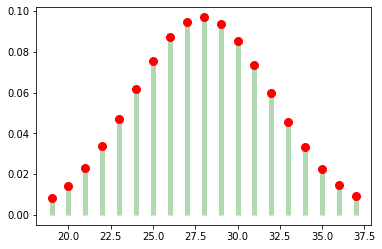

random variable	 [26 26 27 30 33 29 23 24 29 25]


In [6]:
import scipy.stats as spt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Binomial distribution

fig, ax = plt.subplots(1, 1)
n=70; p=0.4;
m,var,skw,kur=spt.binom.stats(n,p,moments='mvsk')
print(m,var,skw,kur)
x = np.arange(spt.binom.ppf(0.01, n, p),spt.binom.ppf(0.99, n, p))
ax.plot(x, spt.binom.pmf(x, n, p), 'ro', ms=8, label='binomial pmf')
ax.vlines(x, 0, spt.binom.pmf(x, n, p), colors='g', lw=5, alpha=0.3)
plt.show()
rv=spt.binom.rvs(n,p,size=10)
print('random variable\t',rv)

0.6 0.6 1.2909944487358056 1.6666666666666667


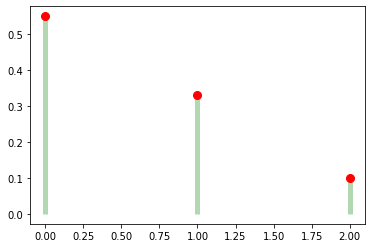

random variable	 [0 1 1 0 1 4 0 1 0 1]


In [7]:
# Poisson distribution

fig, ax = plt.subplots(1, 1)
mu = 0.6
m,var,skw,kur = spt.poisson.stats(mu,moments='mvsk')
print(m,var,skw,kur)
x = np.arange(spt.poisson.ppf(0.01, mu),spt.poisson.ppf(0.99, mu))
ax.plot(x, spt.poisson.pmf(x, mu), 'ro', ms=8, label='poisson pmf')
ax.vlines(x, 0, spt.poisson.pmf(x, mu), colors='g', lw=5, alpha=0.3)
plt.show()
rv=spt.poisson.rvs(mu,size=10)
print('random variable\t',rv)

0.5 0.08333333333333333 0.0 -1.2


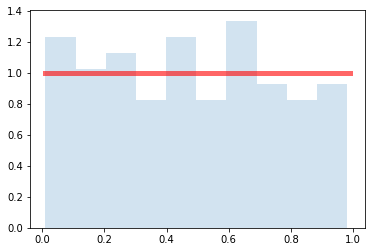

In [8]:
# Uniform distribution

fig, ax = plt.subplots(1, 1)
m, var, skw, kur = spt.uniform.stats(moments='mvsk')
print(m,var,skw,kur)
x = np.linspace(spt.uniform.ppf(0.01),spt.uniform.ppf(0.99), 100)
ax.plot(x, spt.uniform.pdf(x), 'r-', lw=5, alpha=0.6, label='uniform pdf')
rv = spt.uniform.rvs(size=100)
ax.hist(rv, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

1.0 1.0 2.0 6.0


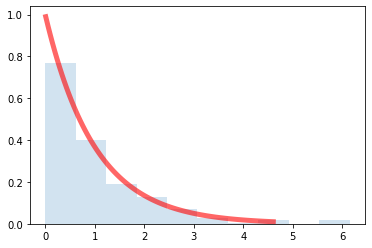

In [9]:
fig, ax = plt.subplots(1, 1)
m, var, skw, kur = spt.expon.stats(moments='mvsk')
print(m,var,skw,kur)
x = np.linspace(spt.expon.ppf(0.01),spt.expon.ppf(0.99), 100)
ax.plot(x, spt.expon.pdf(x),'r-', lw=5, alpha=0.6, label='exponential pdf')
rv = spt.expon.rvs(size=300)
ax.hist(rv, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

5.0 4.0 0.0 0.0


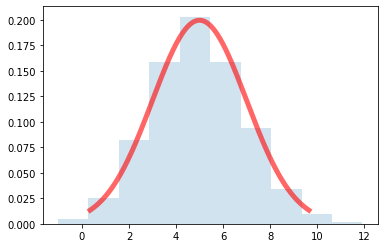

In [10]:
# Normal distribution

fig, ax = plt.subplots(1, 1)
m, var, skw, kur = spt.norm.stats(loc=5,scale=2,moments='mvsk')
print(m,var,skw,kur)
x = np.linspace(spt.norm.ppf(0.01,loc=5,scale=2),spt.norm.ppf(0.99,loc=5,scale=2), 1000)
ax.plot(x, spt.norm.pdf(x,loc=5,scale=2),'r-', lw=5, alpha=0.6, label='normal pdf')
rv = spt.norm.rvs(loc=5,scale=2,size=3000)
ax.hist(rv, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

5.0 10.0 1.2649110640673518 2.4


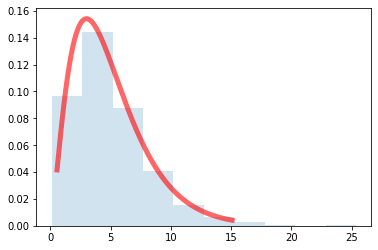

In [11]:
# Chi-squared distribution

fig, ax = plt.subplots(1, 1)
df = 5
m, var, skw, kur = spt.chi2.stats(df, moments='mvsk')
print(m,var,skw,kur)
x = np.linspace(spt.chi2.ppf(0.01, df),spt.chi2.ppf(0.99, df), 1000)
ax.plot(x, spt.chi2.pdf(x, df),'r-', lw=5, alpha=0.6, label='chi-squared pdf')
rv = spt.chi2.rvs(df, size=10000)
ax.hist(rv, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

0.0 3.0 nan inf


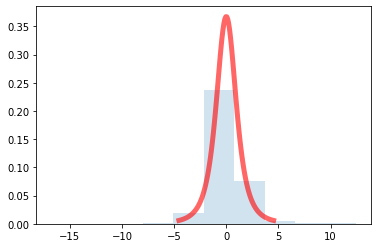

In [12]:
# student's t distribution

fig, ax = plt.subplots(1, 1)
df = 3
m, var, skw, kur = spt.t.stats(df, moments='mvsk')
print(m,var,skw,kur)
x = np.linspace(spt.t.ppf(0.01, df),spt.t.ppf(0.99, df), 100)
ax.plot(x, spt.t.pdf(x, df),'r-', lw=5, alpha=0.6, label='student''s t pdf')
rv = spt.t.rvs(df, size=3000)
ax.hist(rv, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

1.125 0.2805572660098522 1.8065676503195025 7.074636015325671


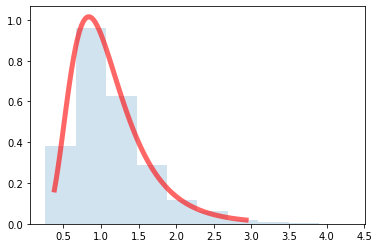

In [13]:
# F distribution

fig, ax = plt.subplots(1, 1)
dfn, dfd = 29, 18
m, var, skw, kur = spt.f.stats(dfn, dfd, moments='mvsk')
print(m,var,skw,kur)
x = np.linspace(spt.f.ppf(0.01, dfn, dfd),spt.f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, spt.f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='F pdf')
rv = spt.f.rvs(dfn, dfd, size=2000)
ax.hist(rv, density=True, histtype='stepfilled', alpha=0.2)
plt.show()